In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.formula.api import logit
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
!pip install scikit-plot
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\
Drive/Natural_Language/Project/Task.zip

Archive:  gdrive/MyDrive/Natural_Language/Project/Task.zip
  inflating: Task.csv                


In [4]:
# Read the data
data = pd.read_csv("Task.csv", encoding='latin-1')

# Exploratory Data Analysis

In [ ]:
data.shape

(9960, 6)

In [ ]:
data.dtypes

News_Headline    object
Link_Of_News     object
Source           object
Stated_On        object
Date             object
Label            object
dtype: object

In [ ]:
# Source value counts
data.Source.value_counts()

Donald Trump                 802
Facebook posts               655
Bloggers                     534
Viral image                  393
Hillary Clinton              210
                            ... 
Larry Krasner                  1
Americas PAC                   1
Don Huffines                   1
Thomas Croci                   1
Amalgamated Transit Union      1
Name: Source, Length: 2709, dtype: int64

In [ ]:
# Label value counts
data.Label.value_counts()

FALSE          2273
barely-true    1737
mostly-true    1722
half-true      1685
pants-fire     1402
TRUE           1036
full-flop        70
half-flip        27
no-flip           8
Name: Label, dtype: int64

In [ ]:
data.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE


#Data pre-processing

In [ ]:
pip install autocorrect

In [6]:
# Importing Libraries
import pandas as pd
import re
import time
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk import word_tokenize
import string
import timeit

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Convert words to lower case
data['Cleaned']= data['News_Headline'].str.lower()

In [8]:
# Take out stopwords
stopwords = set(stopwords.words('english'))
data['Cleaned'] = data['Cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [9]:
# Take out punctuation
i=0
d = []
for s in data['Cleaned']:
  word = s.split()
  cleaned = ' '.join(i for i in word if i not in stopwords and i not in string.punctuation)
  cleaned = re.sub(r'[^\w\s]', '', cleaned)
  d.append(cleaned)

In [10]:
# Add cleaned data to Cleaned column
data['Cleaned'] = d
# Removing digits
data['Cleaned'] = data['Cleaned'].str.replace('\d+', '')
# Remove line-breaks
data['Cleaned'] = data['Cleaned'].replace('<br/>','', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [11]:
# Removing new line characters and tabs----------------> (WASN'T SURE TO EXCLUDE THIS SINCE WE HAVE CODE FOR LINE-BREAKS)
# Also edit .com so that it's easier to address this later
data['Cleaned'] = data['Cleaned'].replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')

In [12]:
# Removing html tags 
l=[]
for line in data['Cleaned']:
  soup = BeautifulSoup(line, "html.parser")
  # Get all the text other than html tags.
  stripped_text = soup.get_text(separator=" ")
  l.append(stripped_text)
data['Cleaned'] = l

In [13]:
# Removing links
l=[]
for line in data['Cleaned']:
  remove_https = re.sub(r'http\S+', '', line)
  # Remove all the occurrences of text that ends with .com
  remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
  l.append(remove_com)
data['Cleaned'] = l

In [14]:
# Removing whitespace
l=[]
for line in data['Cleaned']:
  pattern = re.compile(r'\s+') 
  Without_whitespace = re.sub(pattern, ' ', line)
  # There are some instances where there is no space after '?' & ')', 
  # So these are replaced with one space so that it will not consider two words as one token
  text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
  l.append(text)
data['Cleaned'] = l

In [15]:
# Remove special characters
l=[]
for line in data['Cleaned']:
  formatted = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', line) 
  l.append(formatted)
data['Cleaned'] = l

In [16]:
data.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label,Cleaned
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE,says osama bin laden endorsed joe biden
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,cnn aired video toddler running away another t...
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE,says tim tebow kneeled protest abortion nation...
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,even socalled moderate democrats like joe bide...
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE,our health department city county declared rac...


In [17]:
data[['News_Headline','Cleaned']]

,News_Headline,Cleaned
0,Says Osama bin Laden endorsed Joe Biden,says osama bin laden endorsed joe biden
1,CNN aired a video of a toddler running away fr...,cnn aired video toddler running away another t...
2,Says Tim Tebow kneeled in protest of abortion...,says tim tebow kneeled protest abortion nation...
3,Even so-called moderate Democrats like Joe Bi...,even socalled moderate democrats like joe bide...
4,"""Our health department, our city and our count...",our health department city county declared rac...
...,...,...
9955,Says the Obama administration plans to reduce ...,says obama administration plans reduce number ...
9956,"The Foreign Intelligence Surveillance Court ""i...",foreign intelligence surveillance court is tra...
9957,"""In the past four years, (the U.S. Senate) has...",in past four years the us senate passed nine a...
9958,"On immigration reform, Marco Rubio ""all along ...",immigration reform marco rubio all along sayin...


##Distribute target labels into True and False

In [ ]:
# Data size with all labels present
data.shape

(9960, 7)

In [18]:
# Create new df without the flop & flip categories
new = data[(data['Label']== 'FALSE') | (data['Label']== 'TRUE') | (data['Label']== 'barely-true') | (data['Label']== 'mostly-true') | (data['Label']== 'half-true') | (data['Label']== 'pants-fire')]

In [19]:
# Size without the 3 insignificant categories
new.shape

(9855, 7)

In [20]:
# Label counts
new.Label.value_counts()

FALSE          2273
barely-true    1737
mostly-true    1722
half-true      1685
pants-fire     1402
TRUE           1036
Name: Label, dtype: int64

In [ ]:
# Manually calculated the percentages of each label
1036/9855*100

10.512430238457636

In [21]:
# Added the percentages to list
percentage = [23,14,18,11,17,17]

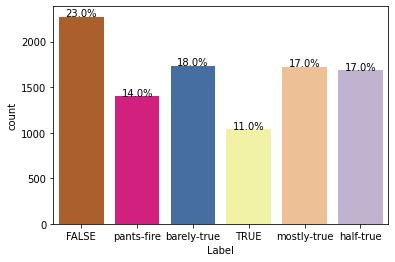

In [ ]:
plt.figure()
ax = sns.countplot(x='Label', data=new, palette='Accent_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+3
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

In [ ]:
# No nulls
new.isnull().sum()

News_Headline    0
Link_Of_News     0
Source           0
Stated_On        0
Date             0
Label            0
Cleaned          0
dtype: int64

In [ ]:
# Barely-true and pants-fire are added to the FALSE category in our data
new['Label'][(new['Label']=='barely-true') | (new['Label']=='pants-fire')] = 'FALSE'

In [ ]:
# Mostly-true and half-true are added to the TRUE category in our data
new['Label'][(new['Label']=='mostly-true') | (new['Label']=='half-true')] = 'TRUE'

In [24]:
# New label counts
new.Label.value_counts()

FALSE    5412
TRUE     4443
Name: Label, dtype: int64

In [ ]:
4443/9855*100

45.083713850837135

In [ ]:
# Added the percentages to list
percentage = [55,45]

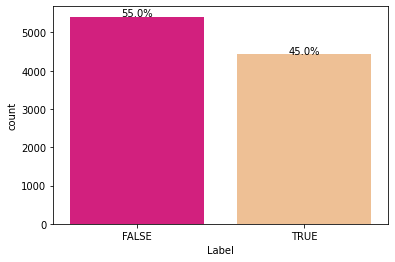

In [ ]:
plt.figure()
ax = sns.countplot(x='Label', data=new, palette='Accent_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+3
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

# Word Clouds

#FALSE

In [ ]:
false = new[new.Label == 'FALSE']

## Headlines

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

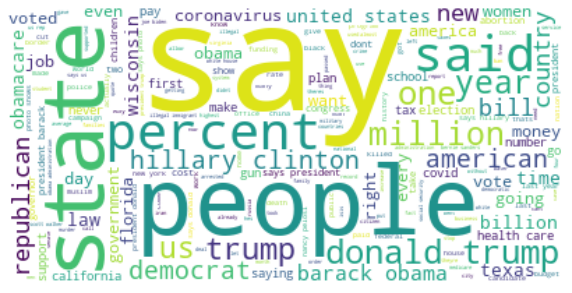

In [ ]:
titles = " ".join(title for title in false.Cleaned)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(titles)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## News Sources

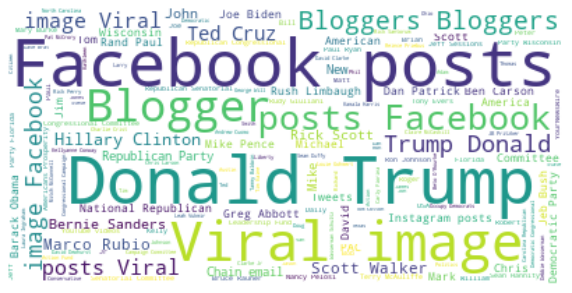

In [ ]:
sources = " ".join(source for source in false.Source)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(sources)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# TRUE


In [ ]:
true = new[new.Label == 'TRUE']

## Headlines

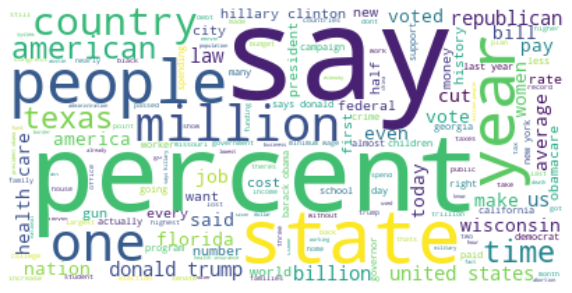

In [ ]:
titles = " ".join(title for title in true.Cleaned)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(titles)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## News Sources

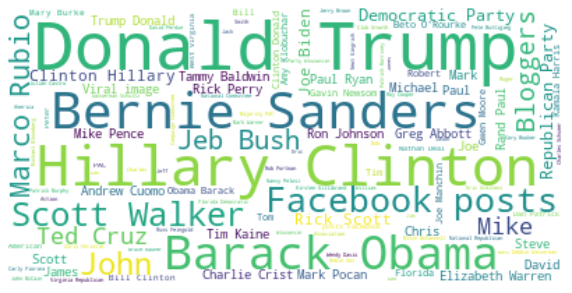

In [ ]:
sources = " ".join(source for source in true.Source)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(sources)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Train/Test Split

In [25]:
#split the data with test = 20%   train = 80%
x = new['Cleaned']
y = new['Label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Binary Logistic Regression

In [ ]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model',LogisticRegression(max_iter = 1000, class_weight='balanced',random_state=1))])

In [ ]:
# Fit model
model = pipe.fit(X_train, y_train)

In [ ]:
# Predict model
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", acc*100,'\n')
print(classification_report(y_test, pred))

confusion matrix
[[698 362]
 [339 572]]


Accuracy of Logistic Regression: 64.43429731100963 

              precision    recall  f1-score   support

       FALSE       0.67      0.66      0.67      1060
        TRUE       0.61      0.63      0.62       911

    accuracy                           0.64      1971
   macro avg       0.64      0.64      0.64      1971
weighted avg       0.65      0.64      0.64      1971



# Random Forest

In [ ]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier(random_state=1))])

In [ ]:
model = pipe.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Random Forest:", acc*100,'\n')
print(classification_report(y_test, pred))

confusion matrix
[[755 305]
 [411 500]]


Accuracy of Random Forest: 63.67326230339929 

              precision    recall  f1-score   support

       FALSE       0.65      0.71      0.68      1060
        TRUE       0.62      0.55      0.58       911

    accuracy                           0.64      1971
   macro avg       0.63      0.63      0.63      1971
weighted avg       0.64      0.64      0.63      1971



#Support Vector Machine

In [ ]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model',  svm.SVC(random_state=1))])

In [ ]:
model = pipe.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of SVM:", acc*100,'\n')
print(classification_report(y_test, pred))

confusion matrix
[[801 259]
 [441 470]]


Accuracy of SVM: 64.48503297818367 

              precision    recall  f1-score   support

       FALSE       0.64      0.76      0.70      1060
        TRUE       0.64      0.52      0.57       911

    accuracy                           0.64      1971
   macro avg       0.64      0.64      0.63      1971
weighted avg       0.64      0.64      0.64      1971



#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', GradientBoostingClassifier(learning_rate=0.1, n_estimators=400, random_state=1))])

In [ ]:
model = pipe.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Gradient Boost:", acc*100,'\n')
print(classification_report(y_test, pred))

confusion matrix
[[812 248]
 [504 407]]


Accuracy of Gradient Boost: 61.84677828513445 

              precision    recall  f1-score   support

       FALSE       0.62      0.77      0.68      1060
        TRUE       0.62      0.45      0.52       911

    accuracy                           0.62      1971
   macro avg       0.62      0.61      0.60      1971
weighted avg       0.62      0.62      0.61      1971



#Voting Classifier (ensemble)

In [ ]:
from sklearn.ensemble import VotingClassifier

model_1 = LogisticRegression()
model_2 = svm.SVC(probability=True)
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=400, random_state=1)
# Combine all 3 models
model = VotingClassifier(estimators=[('lr', model_1), ('svm', model_2), ('rf', model_3), ('gboost', model_4)], voting='hard')

# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', model)])

In [ ]:
model = pipe.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Voting Classifier:", acc*100,'\n')
print(classification_report(y_test, pred))

confusion matrix
[[846 214]
 [486 425]]


Accuracy of Voting Classifier: 64.48503297818367 

              precision    recall  f1-score   support

       FALSE       0.64      0.80      0.71      1060
        TRUE       0.67      0.47      0.55       911

    accuracy                           0.64      1971
   macro avg       0.65      0.63      0.63      1971
weighted avg       0.65      0.64      0.63      1971



#Hyperparameter tuning with Gridsearch & cross validation


##Random Forest

In [26]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier(random_state=1))])

In [ ]:
# See pipeline parameters
pipe.get_params('model')

In [27]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Give different parameter values and let model pick the best
param_grid = [{
    'vect__ngram_range': [(1, 1), (1, 3)],
    # 'vect__max_df': [1.0, 0.8, 0.7, 0.6],
    'model__max_depth':[2,3,4,5],
    'model__n_estimators':[10, 30, 50, 100]
}]

# Provide grid to the search with 10 folds cross validation
search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10, refit=True)

In [37]:
model = search.fit(X_train, y_train)

In [38]:
pred = model.predict(X_test)

In [39]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Random Forest:", acc*100,'\n')
print(classification_report(y_test, pred))
# Summarize Results
print('Best Score: %s' % model.best_score_)
print('Best Hyperparameters: %s' % model.best_params_)

confusion matrix
[[1066   24]
 [ 845   36]]


Accuracy of Random Forest: 55.91070522577372 

              precision    recall  f1-score   support

       FALSE       0.56      0.98      0.71      1090
        TRUE       0.60      0.04      0.08       881

    accuracy                           0.56      1971
   macro avg       0.58      0.51      0.39      1971
weighted avg       0.58      0.56      0.43      1971

Best Score: 0.5601228503599622
Best Hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 10, 'vect__ngram_range': (1, 1)}


##Logistic Regression

In [40]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model',LogisticRegression(max_iter = 1000, class_weight='balanced',random_state=1))])

In [ ]:
# See pipeline parameters
pipe.get_params('model')

In [41]:
# Give difefrent parameter values and let model pick the best
param_grid = [{
    'model__penalty':['l1', 'l2'],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'model__C': [0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5],
    'model__solver' : ['liblinear']
}]

# Provide grid to the search with 10 folds cross validation
search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10, refit=True)

In [42]:
model = search.fit(X_train, y_train)

In [43]:
pred = model.predict(X_test)

In [44]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression:", acc*100,'\n')
print(classification_report(y_test, pred))
# Summarize Results
print('Best Score: %s' % model.best_score_)
print('Best Hyperparameters: %s' % model.best_params_)

confusion matrix
[[715 375]
 [302 579]]


Accuracy of Logistic Regression: 65.65195332318619 

              precision    recall  f1-score   support

       FALSE       0.70      0.66      0.68      1090
        TRUE       0.61      0.66      0.63       881

    accuracy                           0.66      1971
   macro avg       0.65      0.66      0.65      1971
weighted avg       0.66      0.66      0.66      1971

Best Score: 0.6557547303339702
Best Hyperparameters: {'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'vect__ngram_range': (1, 2)}


##Support Vector Machine

In [ ]:
# Create a pipeline with the necessary steps and modeling step in the end
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model',  svm.SVC(random_state=1))])

In [ ]:
# See pipeline parameters
pipe.get_params('model')

In [ ]:
# Give difefrent parameter values and let model pick the best
param_grid = [{
    'model__C':[0.1, 0.001, 0.5],
    'model__gamma': [1, 0.1, 0.01],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_df': [1.0, 0.8],
    'model__kernel' : ['rbf']
}]

# Provide grid to the search with 10 folds cross validation
search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10, refit=True)

In [ ]:
model = search.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
# Model Report
acc = accuracy_score(y_test, pred)
df_conf_matrix = confusion_matrix(y_test, pred)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of SVM:", acc*100,'\n')
print(classification_report(y_test, pred))
# Summarize Results
print('Best Score: %s' % model.best_score_)
print('Best Hyperparameters: %s' % model.best_params_)

Sample Prediction

In [ ]:
pipe = Pipeline([
                 ('vect', CountVectorizer(ngram_range=(1,2))), 
                 ('tfidf', TfidfTransformer()), 
                 ('model',LogisticRegression(max_iter = 1000, class_weight='balanced',random_state=1, C=0.5, penalty='l2', solver='liblinear'))
                 ])

In [ ]:
model = pipe.fit(X_train, y_train)

In [ ]:
model.predict(X_test)

array(['TRUE', 'FALSE', 'FALSE', ..., 'TRUE', 'TRUE', 'FALSE'],
      dtype=object)

In [ ]:
X_test

772     violent crime rates increased two wisconsin ci...
4809    when house wants stop enterprise florida theyr...
2416    t pentagon accounting errors medicare costs t ...
6469    over people die gunviolence every year yet the...
7643        percent new income today is going top percent
                              ...                        
2836    we saw true danger fccs net neutrality repeal ...
9177    the median net worth american households chang...
2790                           most americans dont stocks
1134    we first decline overdose deaths due drugs yea...
3296    thousands killed israel drops tactical nuclear...
Name: Cleaned, Length: 1971, dtype: object

In [ ]:
test_input = input("Enter a news: ") #rising in the global temperature increase the risk of global warming across the world
model.predict([test_input])

Enter a news: rising in temperature causes global warming across the world


array(['TRUE'], dtype=object)